# Quick Start

Let us create a pulse that implements a CZ gate on two atoms in the perfect Rydberg blockade regime.

In [7]:
# %pip install -q rydopt # Uncomment for installing RydOpt on Google Colab

import rydopt as ro
import numpy as np

First, we create the target gate, by specifying the gate phases, the interaction between the atoms and the Rydberg-state decay rate.

In [2]:
gate = ro.gates.TwoQubitGate(phi=None, theta=np.pi, Vnn=float("inf"), decay=0.0)

Then we choose a pulse ansatz that consists of a constant detuning and a sweep of the laser phase. The Rabi frequency amplitude is constant and fixed.

In [3]:
pulse_ansatz = ro.pulses.PulseAnsatz(
    detuning_ansatz=ro.pulses.const, phase_ansatz=ro.pulses.sin_crab
)

A guess of pulse parameters can serve as input for the optimization. Here, we choose to optimize four pulse parameters.

In [4]:
initial_params = (7.0, (0.0,), (0.0, 0.0), ())

Now, we perform the optimization, specifying a target gate infidelity (which also serves as tolerance for the differential equation solver).

In [5]:
opt_result = ro.optimization.optimize(gate, pulse_ansatz, initial_params, tol=1e-10)
optimized_params = opt_result.params


Started optimization using 1 process

proc00: 100%|████| 1000/1000 [00:03<00:00, 297.57it/s, infidelity=7.57e-11, converged=1/1]

=== Optimization finished using Adam ===

Duration: 7.628 seconds
Gates with infidelity below tol=1.0e-10: 1

Optimized gate:
> infidelity <= numerical precision
> parameters = (7.626643597908443, [0.03125944], [0.81977751 0.66389043], [])
> duration = 7.626643597908443


Finally, we can plot the resulting pulse.

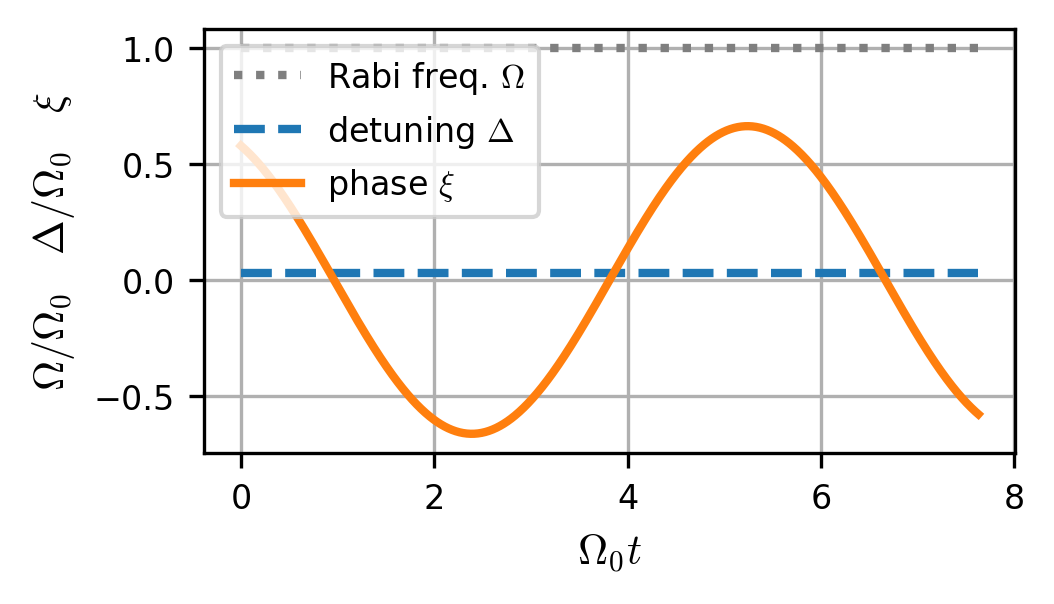

In [6]:
ro.characterization.plot_pulse(pulse_ansatz, optimized_params)